## Working with Images

In this tutorial, we'll use our existing knowledge of PyTorch and linear regression to solve a very different kind of problem: *image classification*. We'll use the famous [*MNIST Handwritten Digits Database*](http://yann.lecun.com/exdb/mnist/) as our training dataset. It consists of 28px by 28px grayscale images of handwritten digits (0 to 9) and labels for each image indicating which digit it represents. Here are some sample images from the dataset:

![mnist-sample](https://i.imgur.com/CAYnuo1.jpg)

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

🧠 What is torchvision in PyTorch?

torchvision is an official PyTorch library that provides tools, datasets, and pretrained models specifically designed for computer vision tasks like:

Image classification

Object detection

Image segmentation

Image transformations and preprocessing

It helps you work with image data easily — instead of writing all the low-level code yourself.

⚙️ Main Components of torchvision
| Component                    | Description                                                   | Example                                                               |
| ---------------------------- | ------------------------------------------------------------- | --------------------------------------------------------------------- |
| **`torchvision.datasets`**   | Ready-to-use popular datasets for training/testing            | `CIFAR10`, `MNIST`, `ImageNet`, etc.                                  |
| **`torchvision.transforms`** | Image preprocessing utilities (resize, crop, normalize, etc.) | `transforms.Compose([transforms.Resize(256), transforms.ToTensor()])` |
| **`torchvision.models`**     | Pretrained deep learning models for vision tasks              | `resnet50`, `vgg16`, `mobilenet_v3`, etc.                             |
| **`torchvision.io`**         | Functions for reading and writing images/videos               | `torchvision.io.read_image("img.png")`                                |


In [7]:
dataset = MNIST(root='/content/data', download=True)

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.07MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 161kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.6MB/s]


not only downloaded the file it automatically converts to pytorch dataset

In [8]:
len(dataset)

60000

The dataset has 60,000 images that we'll use to train the model. There is also an additional test set of 10,000 images used for evaluating models and reporting metrics in papers and reports. We can create the test dataset using the `MNIST` class by passing `train=False` to the constructor.

In [10]:
test_dataset = MNIST(root = '/content/data',train = False)

In [11]:
len(test_dataset)

10000

## 🧠 How MNIST Dataset Works in PyTorch

When we download MNIST using:
```python
from torchvision.datasets import MNIST
dataset = MNIST(root='/content/data', download=True)
PyTorch automatically:

Downloads raw binary files (.ubyte format).

Converts them to tensors and saves as:

bash
Copy code
/data/MNIST/processed/
├── training.pt
└── test.pt
Each .pt file contains a tuple of tensors:

python
Copy code
(images_tensor, labels_tensor)
🖼️ Image Tensor Details
Shape: [60000, 28, 28] for training data

Each pixel → brightness value

0 → black

255 → white

In-between → gray levels

After transforms.ToTensor(), values are normalized to range [0.0, 1.0]

🏷️ Label Tensor Details
Shape: [60000]

Contains digit class labels (0–9)

🧮 Example in Code
python
Copy code
from torchvision.datasets import MNIST
from torchvision import transforms

dataset = MNIST(root='/content/data', download=True, transform=transforms.ToTensor())

img, label = dataset[0]
print(type(img), img.shape)   # torch.Tensor, torch.Size([1, 28, 28])
print(label)                  # Example: 5



label 5


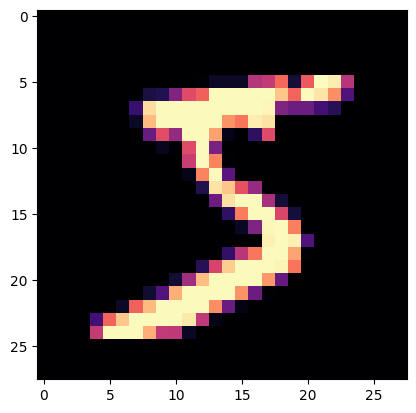

In [18]:
import matplotlib.pyplot as plt
image,label = dataset[0]
plt.imshow(image,cmap='magma')
print('label',label)

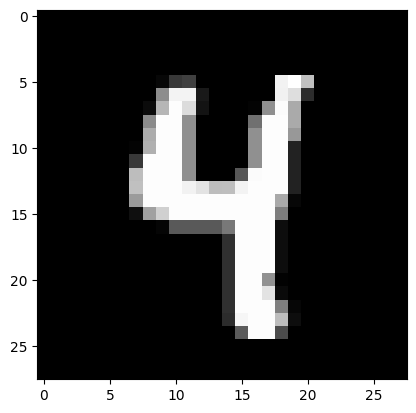

In [20]:
image,label = dataset[49546]
plt.imshow(image,cmap='gray')

Summary of Data Evolution                                             
Disk: Compressed Bytes (idx format).

Dataset Load: PIL Image (28, 28), Integers 0-255.

ToTensor: Tensor (1, 28, 28), Floats 0.0-1.0.

Normalize: Tensor (1, 28, 28), Floats ~ -0.4 to 2.8.

DataLoader: Tensor (64, 1, 28, 28), Ready for Model.

## 💾 Understanding Image Tensor Structure (C, H, W)

When working with images in PyTorch, the raw pixel data must be converted into a tensor structure that the **Convolutional Neural Network (CNN)** can understand and process efficiently. This is why the `transforms.ToTensor()` step adds the **Channel (C)** dimension and reorders the structure.

---

### 1. The Channel Dimension ($\mathbf{C}$)

The channel dimension is added to specify the type of information stored per pixel.

| Image Type | Channel Count ($\mathbf{C}$) | Example Shape (Single Image) | Rationale |
| :--- | :--- | :--- | :--- |
| **Grayscale** (MNIST) | $\mathbf{1}$ | $\mathbf{(1, 28, 28)}$ | Stores only **luminance** (brightness). |
| **Color** (RGB) | $\mathbf{3}$ | $\mathbf{(3, H, W)}$ | Stores **Red, Green, and Blue** intensities separately. |



[Image of RGB color channels separated]


### 2. The Final Tensor Form (4D Structure)

The goal of the transformation pipeline is to provide the CNN with a spatially intact data structure.

* **Classic Neural Networks (MLP):** These require a flattened **1D array** (e.g., $784$ features) because they treat every pixel independently.
* **Convolutional Neural Networks (CNN):** These require the **spatial adjacency** of pixels to be preserved so the convolutional **filters (kernels)** can scan and detect local patterns (edges, corners).

Therefore, the final data structure, when passed to the model in batches, is a **4D Tensor**:

$$\mathbf{(B, C, H, W)}$$

Where:
* $\mathbf{B}$: **Batch Size** (The number of images processed simultaneously).
* $\mathbf{C}$: **Channels** (1 for MNIST).
* $\mathbf{H}$: **Height** (28 pixels).
* $\mathbf{W}$: **Width** (28 pixels).

This 4D structure is the standard input requirement for almost all modern image classification models.

In [22]:
from torchvision import transforms

In [23]:
dataset = MNIST(root='/content/data',train=True,transform=transforms.ToTensor())

In [24]:
img_tensor,label = dataset[342]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 4


In [25]:
print(img_tensor)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

TypeError: Invalid shape (1, 28, 28) for image data

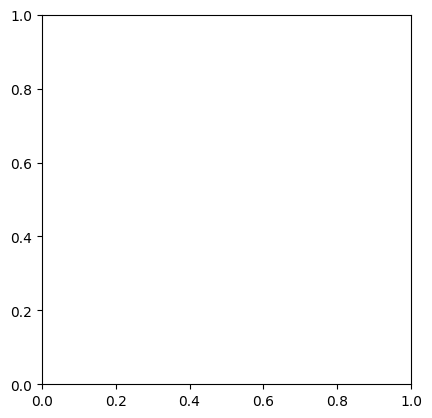

In [26]:
plt.imshow(img_tensor,cmap='gray')

This error is happening because Matplotlib expects image data in shape (H, W) for grayscale or (H, W, 3/4) for RGB/RGBA, but your tensor has shape (1, 28, 28) — that extra leading 1 channel dimension is causing the problem.

✅ How to fix it
You need to remove (or "squeeze") the channel dimension:
plt.imshow(img_tensor.squeeze(), cmap='gray')
plt.show()


- .squeeze() removes dimensions of size 1, so (1, 28, 28) becomes (28, 28).
- Now Matplotlib sees it as a proper 2D grayscale image.


grayscale is only 1 channel but usually other colours which we see are 3 channels they are r g b 

train test split , we also need validation dataset here

In [28]:
from torch.utils.data import random_split
train_ds,val_ds = random_split(dataset,[50000,10000])
len(train_ds),len(val_ds)

(50000, 10000)

In [29]:
from torch.utils.data import DataLoader
batch_size=128

train_loader=DataLoader(train_ds,batch_size,shuffle=True)
val_loader = DataLoader(val_ds,batch_size)

## Model

Now that we have prepared our data loaders, we can define our model.

* A **logistic regression** model is almost identical to a linear regression model. It contains weights and bias matrices, and the output is obtained using simple matrix operations (`pred = x @ w.t() + b`). 

* As we did with linear regression, we can use `nn.Linear` to create the model instead of manually creating and initializing the matrices.

* Since `nn.Linear` expects each training example to be a vector, each `1x28x28` image tensor is _flattened_ into a vector of size 784 `(28*28)` before being passed into the model. 

* The output for each image is a vector of size 10, with each element signifying the probability of a particular target label (i.e., 0 to 9). The predicted label for an image is simply the one with the highest probability.

In [32]:
import torch.nn as nn
input_size = 28*28
num_classes = 10

#logistic regression model
model = nn.Linear(input_size,num_classes)

In [33]:
print(model.parameters)

<bound method Module.parameters of Linear(in_features=784, out_features=10, bias=True)>


In [34]:
print(model.weight.shape)

torch.Size([10, 784])


In [35]:
model.weight

Parameter containing:
tensor([[ 0.0217,  0.0219, -0.0285,  ..., -0.0293,  0.0204,  0.0092],
        [ 0.0045, -0.0242,  0.0073,  ...,  0.0154, -0.0070,  0.0033],
        [-0.0233, -0.0176, -0.0301,  ...,  0.0038,  0.0038,  0.0083],
        ...,
        [-0.0130, -0.0286,  0.0271,  ...,  0.0053,  0.0124,  0.0042],
        [-0.0163, -0.0007, -0.0129,  ..., -0.0009, -0.0201, -0.0301],
        [-0.0211,  0.0319,  0.0200,  ..., -0.0205,  0.0314,  0.0188]],
       requires_grad=True)

In [36]:
model.bias

Parameter containing:
tensor([-0.0302,  0.0030,  0.0122, -0.0352, -0.0086,  0.0090,  0.0275, -0.0212,
        -0.0136, -0.0200], requires_grad=True)

In [39]:
for images,label in train_loader:
    print(label)
    print(images.shape)
    print(model(images))
    break

tensor([4, 1, 2, 3, 9, 9, 2, 1, 9, 3, 9, 2, 6, 8, 6, 7, 2, 3, 0, 1, 6, 4, 2, 1,
        9, 8, 6, 4, 7, 8, 2, 9, 7, 4, 4, 3, 1, 1, 8, 6, 2, 9, 2, 8, 1, 7, 6, 8,
        3, 8, 5, 3, 7, 3, 7, 7, 6, 9, 9, 8, 2, 3, 0, 6, 7, 6, 4, 5, 6, 2, 6, 0,
        4, 5, 6, 5, 5, 6, 0, 9, 3, 0, 9, 5, 0, 2, 4, 9, 4, 7, 9, 9, 2, 4, 8, 6,
        5, 7, 1, 6, 1, 1, 7, 3, 9, 2, 2, 3, 9, 4, 3, 0, 1, 5, 5, 4, 3, 9, 4, 5,
        3, 5, 4, 5, 0, 6, 0, 9])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

The code above leads to an error because our input data does not have the right shape. Our images are of the shape 1x28x28, but we need them to be vectors of size 784, i.e., we need to flatten them. We'll use the `.reshape` method of a tensor, which will allow us to efficiently 'view' each image as a flat vector without really creating a copy of the underlying data. To include this additional functionality within our model, we need to define a custom model by extending the `nn.Module` class from PyTorch. 

A class in Python provides a "blueprint" for creating objects. Let's look at an example of defining a new class in Python.

In [43]:
images = images.reshape(128,784)
images.shape

torch.Size([128, 784])

In [44]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes)

    def forward(self,xb):
        xb = xb.reshape(128,784)
        out = self.linear(xb)
        return out    

In [45]:
model = MnistModel()

Inside the `__init__` constructor method, we instantiate the weights and biases using `nn.Linear`. And inside the `forward` method, which is invoked when we pass a batch of inputs to the model, we flatten the input tensor and pass it into `self.linear`.

`xb.reshape(-1, 28*28)` indicates to PyTorch that we want a *view* of the `xb` tensor with two dimensions. The length along the 2nd dimension is 28\*28 (i.e., 784). One argument to `.reshape` can be set to `-1` (in this case, the first dimension) to let PyTorch figure it out automatically based on the shape of the original tensor.

Note that the model no longer has `.weight` and `.bias` attributes (as they are now inside the `.linear` attribute), but it does have a `.parameters` method that returns a list containing the weights and bias.

In [46]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0012,  0.0080, -0.0341,  ..., -0.0029,  0.0292,  0.0320],
         [-0.0211, -0.0080, -0.0102,  ..., -0.0094,  0.0088,  0.0129],
         [ 0.0276, -0.0333, -0.0292,  ..., -0.0257, -0.0253, -0.0179],
         ...,
         [-0.0333,  0.0257,  0.0062,  ..., -0.0298,  0.0330, -0.0040],
         [ 0.0233,  0.0268,  0.0014,  ...,  0.0255, -0.0075,  0.0222],
         [-0.0267,  0.0117, -0.0015,  ...,  0.0143, -0.0040, -0.0051]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0003, -0.0044,  0.0018,  0.0085, -0.0299, -0.0085, -0.0007, -0.0009,
          0.0256,  0.0243], requires_grad=True)]

In [50]:
outputs = []
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.0943,  0.2378,  0.0422, -0.0703,  0.1660, -0.1327, -0.1530,  0.0365,
          0.0362,  0.1699],
        [ 0.4040,  0.1805,  0.0515, -0.1358,  0.5868,  0.1992,  0.0115,  0.1621,
         -0.0575,  0.4989]])


For each of the 100 input images, we get 10 outputs, one for each class. As discussed earlier, we'd like these outputs to represent probabilities. Each output row's elements must lie between 0 to 1 and add up to 1, which is not the case. 

To convert the output rows into probabilities, we use the softmax function, which has the following formula:

![softmax](https://i.imgur.com/EAh9jLN.png)

First, we replace each element `yi` in an output row by `e^yi`, making all the elements positive. 

![](https://www.montereyinstitute.org/courses/DevelopmentalMath/COURSE_TEXT2_RESOURCE/U18_L1_T1_text_final_6_files/image001.png)



Then, we divide them by their sum to ensure that they add up to 1. The resulting vector can thus be interpreted as probabilities.

While it's easy to implement the softmax function (you should try it!), we'll use the implementation that's provided within PyTorch because it works well with multidimensional tensors (a list of output rows in our case).

In [51]:
import torch.nn.functional as F

In [53]:
probs = F.softmax(outputs,dim =1 )

dim one means apply softmax to columns 

In [54]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([1, 4, 0, 9, 0, 0, 4, 0, 0, 0, 9, 4, 9, 4, 4, 9, 4, 1, 4, 4, 0, 4, 3, 4,
        4, 9, 4, 9, 4, 4, 3, 0, 9, 5, 4, 4, 4, 0, 5, 4, 9, 4, 3, 4, 2, 9, 5, 9,
        4, 4, 4, 0, 0, 4, 4, 1, 4, 8, 4, 8, 4, 5, 0, 5, 4, 9, 4, 5, 0, 0, 0, 0,
        0, 0, 0, 4, 4, 4, 4, 4, 9, 1, 4, 9, 4, 4, 8, 4, 4, 4, 1, 1, 4, 4, 0, 0,
        0, 4, 4, 0, 0, 4, 4, 4, 4, 0, 0, 4, 4, 0, 8, 4, 4, 9, 4, 0, 4, 9, 0, 4,
        4, 4, 9, 6, 9, 9, 5, 0])
tensor([0.1206, 0.1448, 0.1230, 0.1252, 0.1171, 0.1299, 0.1253, 0.1289, 0.1332,
        0.1182, 0.1257, 0.1393, 0.1379, 0.1227, 0.1228, 0.1223, 0.1127, 0.1237,
        0.1353, 0.1513, 0.1184, 0.1366, 0.1384, 0.1195, 0.1556, 0.1323, 0.1186,
        0.1195, 0.1412, 0.1338, 0.1246, 0.1235, 0.1489, 0.1324, 0.1435, 0.1766,
        0.1244, 0.1419, 0.1287, 0.1573, 0.1454, 0.1186, 0.1251, 0.1271, 0.1167,
        0.1278, 0.1257, 0.1303, 0.1303, 0.1310, 0.1449, 0.1181, 0.1208, 0.1260,
        0.1325, 0.1401, 0.1399, 0.1203, 0.1399, 0.1139, 0.1402, 0.1219, 0.1228,
       